In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

*Answer here*

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [3]:
# code here
df=pd.read_csv('../data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [4]:
# code here
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [5]:
### Exploration des données numériques

### transformation de la varible day et months en variable dayoftheyear

import datetime as dt
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(dict(year=2024, month=df['month_num'], day=df['day'])) ## on suppose 'alnnée 2024, cela n'est pas spécifié dans le jeu de données, pas de vraible année

# Extraction du jour dans l’année
df['dayoftheyear'] = df['date'].dt.dayofyear

df.dayoftheyear.unique()

df.drop(columns=['month_num','date','day','month'],inplace=True)
df.info()
df.dayoftheyear.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   duration      45211 non-null  int64 
 10  campaign      45211 non-null  int64 
 11  pdays         45211 non-null  int64 
 12  previous      45211 non-null  int64 
 13  poutcome      45211 non-null  object
 14  y             45211 non-null  object
 15  dayoftheyear  45211 non-null  int32 
dtypes: int32(1), int64(6), object(9)
memory usage: 5.3+ MB


count    45211.000000
mean       172.109044
std         74.763073
min          6.000000
25%        130.000000
50%        156.000000
75%        218.000000
max        366.000000
Name: dayoftheyear, dtype: float64

In [6]:
# code here
numeric_ = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric_)
df_num.head()


,age,balance,duration,campaign,pdays,previous,dayoftheyear
0,58,2143,261,1,-1,0,126
1,44,29,151,1,-1,0,126
2,33,2,76,1,-1,0,126
3,47,1506,92,1,-1,0,126
4,33,1,198,1,-1,0,126


In [7]:
### observation des valeurs manquantes
df_num.isna().sum()

age             0
balance         0
duration        0
campaign        0
pdays           0
previous        0
dayoftheyear    0
dtype: int64

In [8]:
### normalisation des données numériques 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
scaled_features_ = num_pipeline.fit_transform(df_num)


### sauvegarde des rasultats dans le dataframe df_norm
df_norm = pd.DataFrame(scaled_features_, index=df.index, columns=df_num.columns)
df_norm.describe()



,age,balance,duration,campaign,pdays,previous,dayoftheyear
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17,1.709917e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-2.221831e+00
25%,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,-5.632394e-01
50%,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01,-2.154703e-01
75%,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,6.138253e-01
max,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02,2.593434e+00


In [9]:
## valeurs aberrantes de previous à supprimer
maxprevious = df_norm['previous'].max()
df_norm = df_norm[df_norm['previous'] != maxprevious]


Plot histograms of features

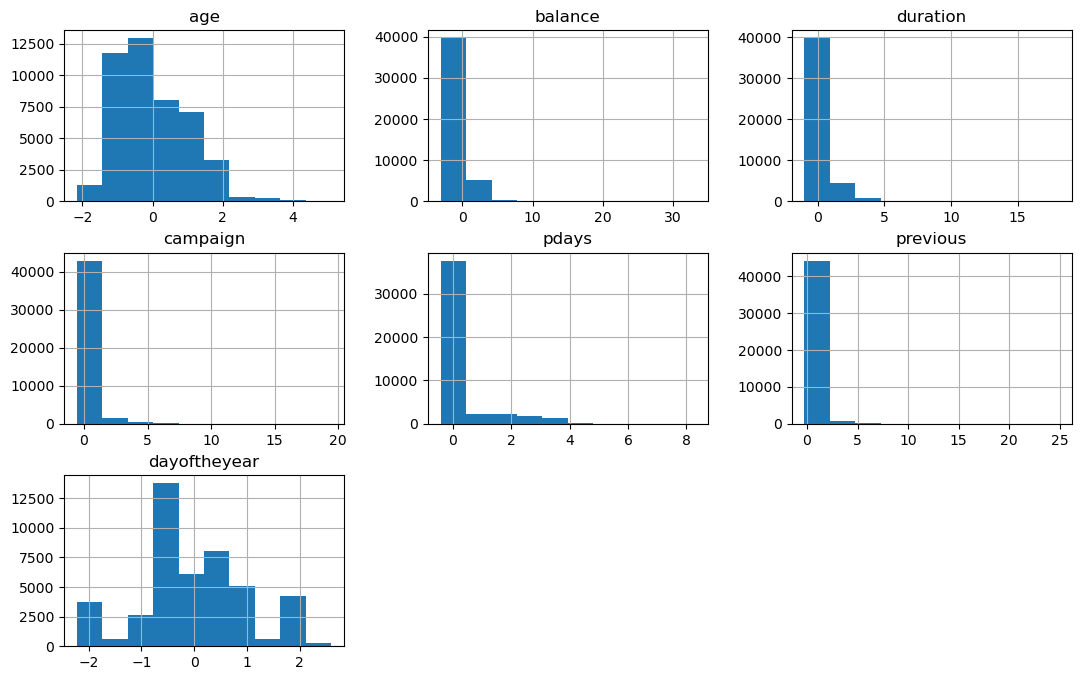

In [10]:
# code here
rcParams['figure.figsize'] = 13,8
plots = df_norm.hist()


## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [11]:
# code here
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [12]:
# code here
nb_clusters = 5
kmeans = KMeans(n_clusters = nb_clusters, random_state=42).fit(df_norm)

Print the centroids obtained

In [13]:
# code here
print(kmeans.cluster_centers_)

[[-6.32674438e-01 -1.75589627e-01  9.76225122e-02 -1.60816481e-01
  -3.63119556e-01 -2.08955846e-01 -1.77456816e-01]
 [ 2.91751382e-02  3.29678287e-02  1.25808937e-04 -1.39109630e-02
   1.55414973e+00  4.61998748e+00  6.11868501e-02]
 [ 2.30767281e-01  4.17769223e+00  7.98841725e-02 -7.38875915e-02
  -1.18403238e-01 -6.21735709e-02  5.15334991e-01]
 [-1.49138505e-01 -1.04373292e-01  2.95551335e-03 -2.28343736e-01
   2.46926815e+00  8.01671269e-01 -7.02598310e-01]
 [ 9.17434644e-01 -6.04329895e-02 -1.45096203e-01  3.02402179e-01
  -2.96751558e-01 -1.67845928e-01  4.17833264e-01]]


Print the cluster labels assigned to each point

In [14]:
# code here
print(kmeans.labels_)

[4 0 0 ... 4 4 1]


([<matplotlib.axis.XTick at 0x221216c9700>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

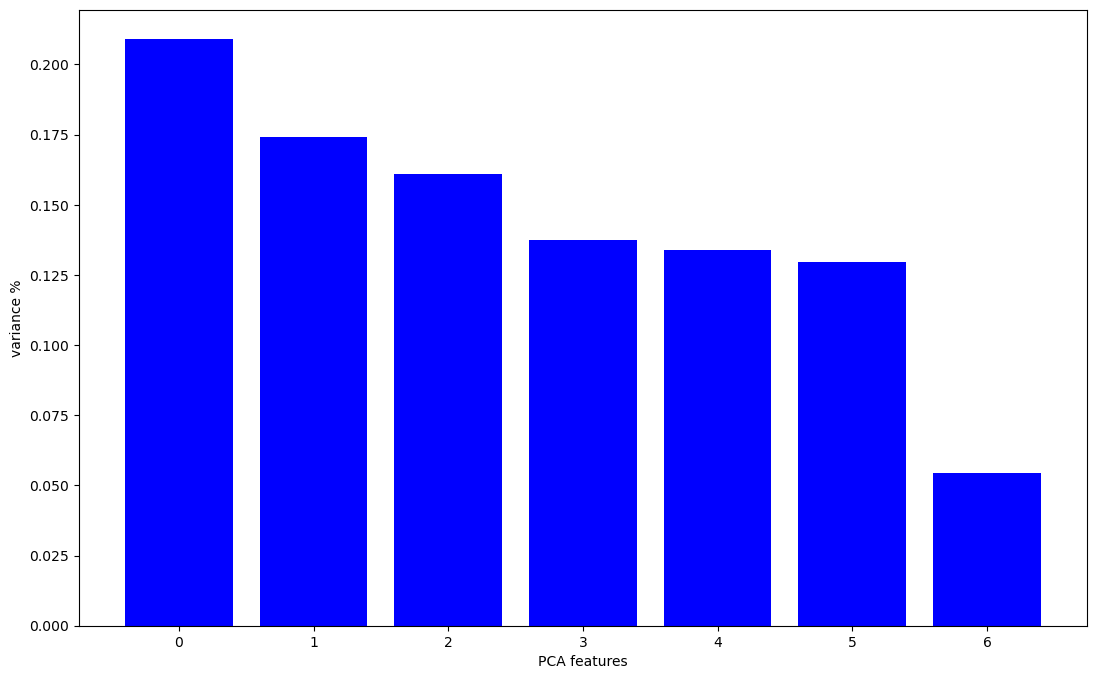

In [15]:
# code here
from sklearn.decomposition import PCA

# principal components
pca = PCA()
res_pca = pca.fit_transform(df_norm)

# scree plot
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="blue")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

<!-- ### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to. -->

In [16]:


reduced_data = PCA(n_components=2).fit_transform(df_norm)
principalDf = pd.DataFrame(data = reduced_data,
                           columns = ['pc 1', 'pc 2'])
principalDf["cluster label"] = kmeans.labels_
principalDf

,pc 1,pc 2,cluster label
0,-0.294218,0.683405,4
1,-0.072755,-0.517687,0
2,0.061163,-1.126608,0
3,-0.168978,-0.066438,4
4,0.093334,-1.105144,0
...,...,...,...
45205,-1.100345,1.268151,4
45206,-1.449563,2.446516,4
45207,0.306861,4.103811,4
45208,-1.393241,1.460872,4


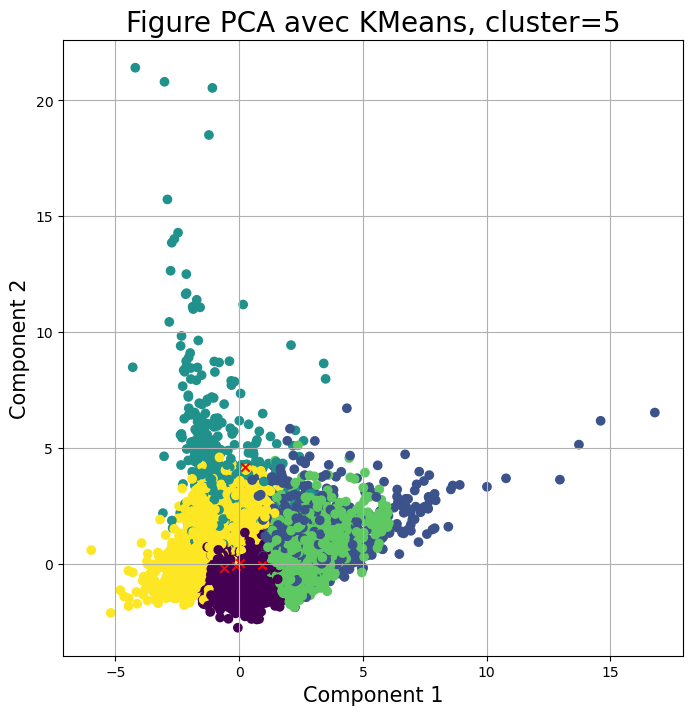

In [17]:
rcParams['figure.figsize'] = 9,6
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title("Figure PCA avec KMeans, cluster={}".format(nb_clusters), fontsize = 20)

ax.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=principalDf.iloc[:,2])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
ax.grid()

In [18]:
### TNSE

from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
projected_tsne = tsne.fit_transform(df_norm)
tsneDf = pd.DataFrame(data = projected_tsne,
                           columns = ['pc 1', 'pc 2'])
tsneDf["cluster label"] = kmeans.labels_
tsneDf


,pc 1,pc 2,cluster label
0,-3.729501,51.731091,4
1,52.524101,66.425491,0
2,77.358185,28.875586,0
3,39.954540,76.504303,4
4,74.493973,8.084164,0
...,...,...,...
45205,-58.296188,57.815189,4
45206,-42.015419,88.869453,4
45207,-40.045570,81.327538,4
45208,-47.129887,84.760872,4


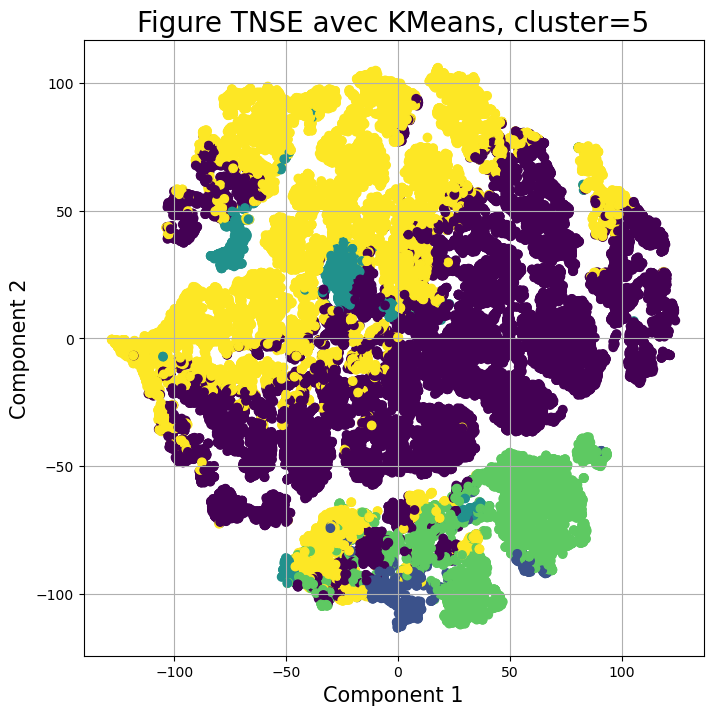

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title("Figure TNSE avec KMeans, cluster={}".format(nb_clusters), fontsize = 20)

ax.scatter(tsneDf.iloc[:,0], tsneDf.iloc[:,1], c=tsneDf.iloc[:,2])
ax.grid()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [20]:
# code here
inertia = kmeans.inertia_
print(f"Inertia (WCSS) = {inertia:.2f} for a number cluster of {nb_clusters}")

Inertia (WCSS) = 191333.84 for a number cluster of 5


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [21]:
# code here
from sklearn.metrics import silhouette_samples, silhouette_score

score = silhouette_score(df_norm, kmeans.labels_)
print("The silhouette score is {}, for a number of clusters of {}" .format(score, nb_clusters))

The silhouette score is 0.21778181987676992, for a number of clusters of 5


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [22]:
# code here
score_silh=[]
nb_clusters_trials = [i for i in range(2,10)]
for nb in nb_clusters_trials:
    kmeans = KMeans(n_clusters = nb, random_state=42).fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    score_silh.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(nb, score))

For n_clusters = 2, the silhouette score is 0.3567252295265575)
For n_clusters = 3, the silhouette score is 0.20163577983221412)
For n_clusters = 4, the silhouette score is 0.22157294210818018)
For n_clusters = 5, the silhouette score is 0.21778181987676992)
For n_clusters = 6, the silhouette score is 0.2313264092514609)
For n_clusters = 7, the silhouette score is 0.22642406681398652)
For n_clusters = 8, the silhouette score is 0.24407212813650192)
For n_clusters = 9, the silhouette score is 0.2057251554832959)


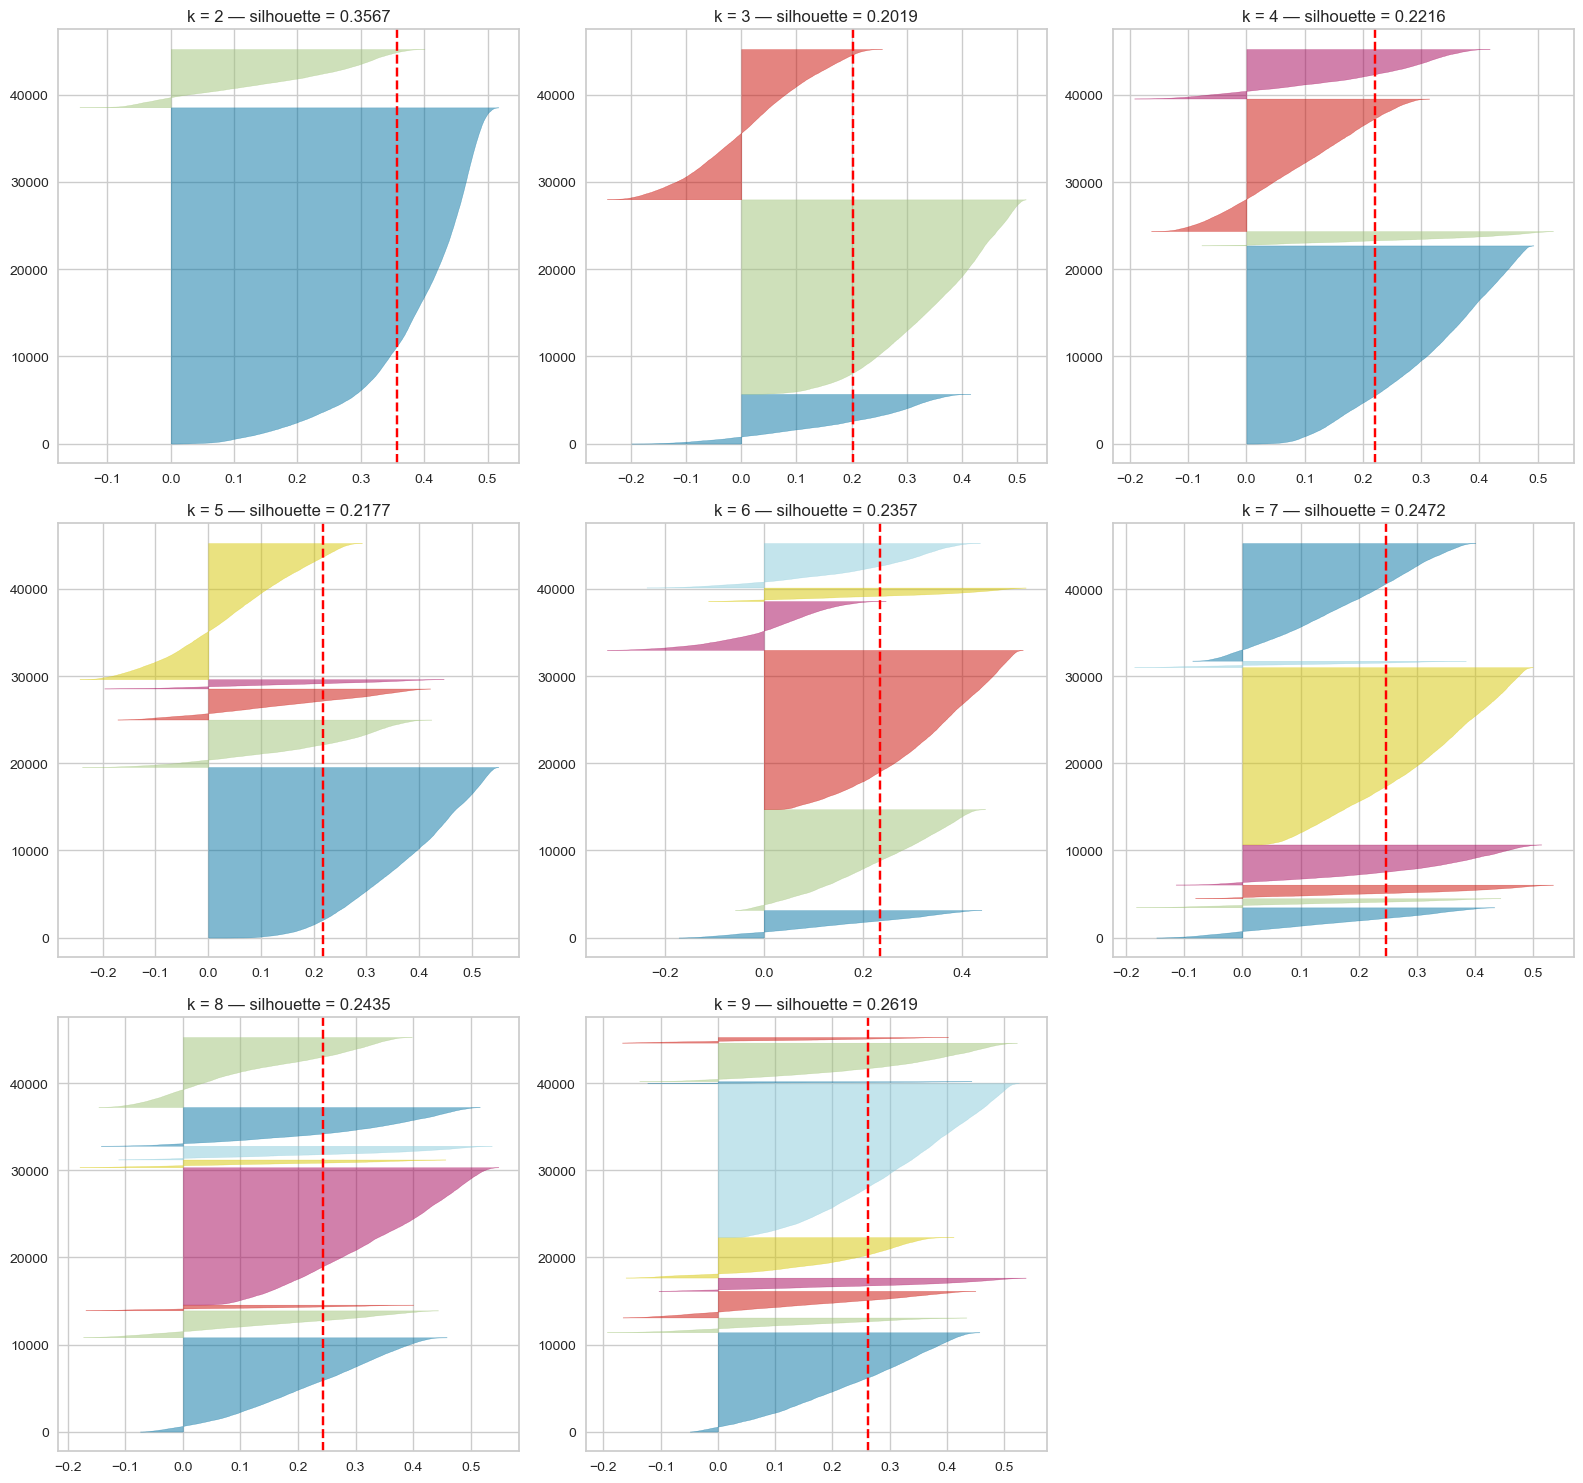

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

ks = range(2, 10)  ### 10 différents clusters (20 c'est largement trop)
n_cols = 3
n_rows = (len(ks) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 15))
axes = axes.ravel()

for i, k in enumerate(ks):  ### plot des différentes sihlouettes scores 
    ax = axes[i]
    km = KMeans(n_clusters=k, random_state=42, n_init=3)
    viz = SilhouetteVisualizer(
        km, ax=ax, colors="yellowbrick",
        sample_size=2000, random_state=42,
        n_jobs=-1
    )
    viz.fit(df_norm)
    score = viz.silhouette_score_
    ax.set_title(f"k = {k} — silhouette = {score:.4f}")

# masquer axes inutilisés s'il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

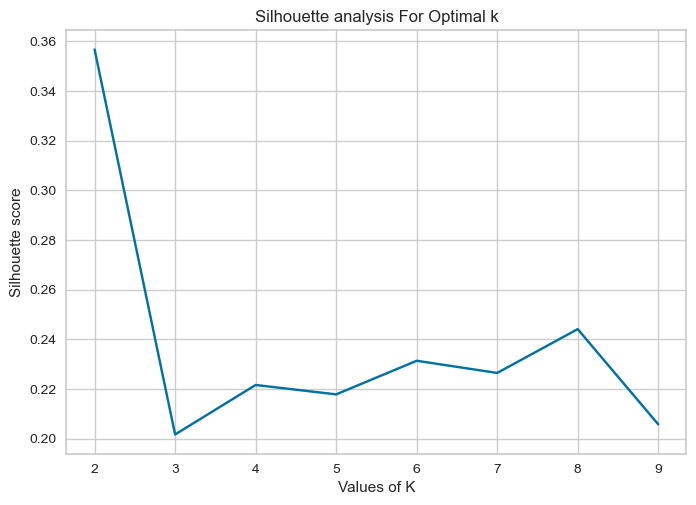

The best number of clusters is 2 with a silhouette score of 0.357


In [24]:
score

# Plot the silhouette scores against the number of clusters
plt.plot(ks, score_silh, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Find the number of clusters with the highest silhouette score
optimal_k = ks[score_silh.index(max(score_silh))]
print(f"The best number of clusters is {optimal_k} with a silhouette score of {max(score_silh):.3f}")

What is the optimal number of clusters that you obtained?

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\mvana\AppData\Local\Temp\ipykernel_18348\248397423.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', optimal_k)   # palette discrète


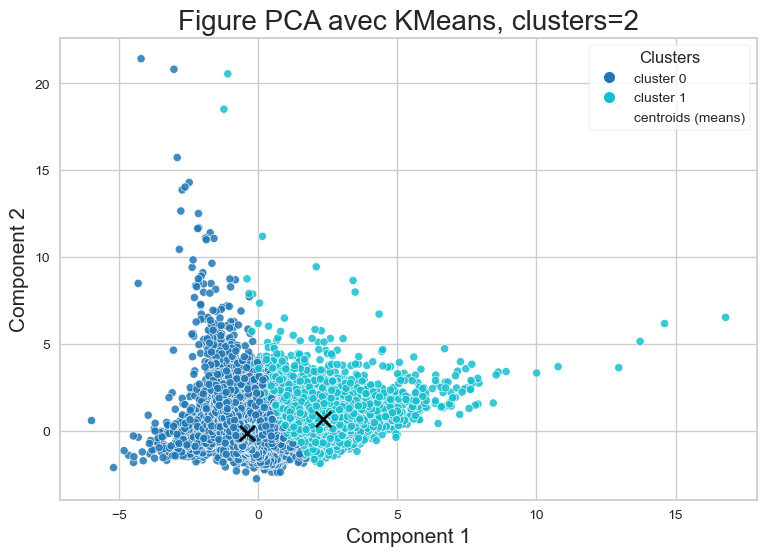

In [ ]:
#PCA pour récupérer l'objet
pca = PCA(n_components=2, random_state=42)
X2d = pca.fit_transform(df_norm)  # shape (n, 2)

# DataFrame PCA + labels
principalDfBest = pd.DataFrame(X2d, columns=['pc 1', 'pc 2'])
Kmeans_labels = kmeansBest.labels_          # ou principalDfBest["cluster label"].to_numpy()
principalDfBest["cluster label"] = Kmeans_labels

# "Centroids" visuels = moyennes des points (dans l'espace original), puis projection PCA
centroids = np.vstack([
    df_norm[Kmeans_labels == j].mean(axis=0).to_numpy()
    for j in range(optimal_k)
])                                           # shape (k, d_original)
centroids_2d = pca.transform(centroids)      # shape (k, 2)

# Plot
rcParams['figure.figsize'] = (9, 6)
fig, ax = plt.subplots()

ax.set_xlabel('Component 1', fontsize=15)
ax.set_ylabel('Component 2', fontsize=15)
ax.set_title(f"Figure PCA avec KMeans, clusters={optimal_k}", fontsize=20)

cmap = plt.cm.get_cmap('tab10', optimal_k)   # palette discrète

sc = ax.scatter(
    principalDfBest["pc 1"],
    principalDfBest["pc 2"],
    c=Kmeans_labels,
    cmap=cmap,
    s=35,
    alpha=0.85,
    edgecolors='white',
    linewidths=0.5
)

# centroïdes projetés
ax.scatter(
    centroids_2d[:, 0], centroids_2d[:, 1],
    c='black', marker='x', s=120, linewidths=2, label='centroids (means)'
)

# Légende propre
handles = [plt.Line2D([0],[0], marker='o', linestyle='',
                      markersize=8, markerfacecolor=cmap(j),
                      markeredgecolor='white', label=f'cluster {j}')
           for j in range(optimal_k)]
handles.append(plt.Line2D([0],[0], marker='x', linestyle='',
                          markersize=10, markeredgecolor='black',
                          markerfacecolor='black', label='centroids (means)'))
ax.legend(handles=handles, title="Clusters", frameon=True)

ax.grid(True)
plt.show()

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

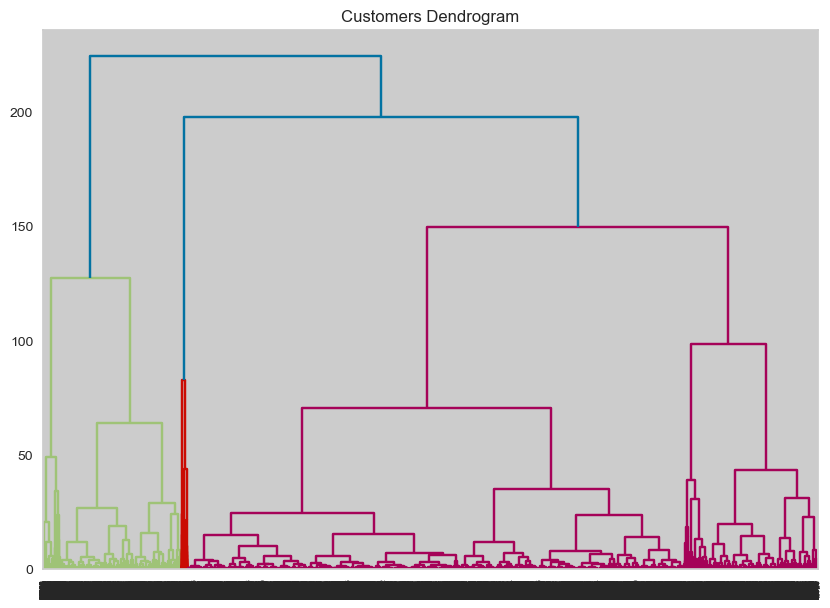

In [26]:
# code here
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = df_norm.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

How many clusters did you find?

*Answer here*       
6 clusters could be chose but to compare with Kmeans we choose a number of 2 clusters

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [56]:
# code here
from sklearn.cluster import AgglomerativeClustering

AggloCluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
Agglo_models = AggloCluster.fit(df_norm)


In [57]:
agglo_labels=Agglo_models.labels_

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\mvana\AppData\Local\Temp\ipykernel_18348\3298125521.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 6)  # palette discrète


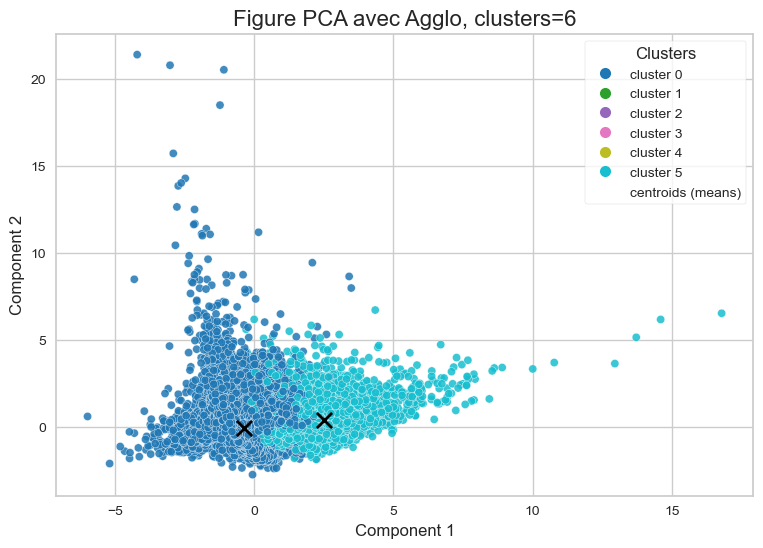

In [58]:
from matplotlib import rcParams

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X2d = pca.fit_transform(df_norm)

principalDfBest_agglo = pd.DataFrame(X2d, columns=['pc 1', 'pc 2'])

# Agglomératif (k=6) — ward => euclidien
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agg.fit_predict(df_norm)

principalDfBest_agglo["cluster label"] = agglo_labels

# "Centroids" visuels = moyennes par cluster (espace original) puis projection PCA
centroids = np.vstack([
    df_norm[agglo_labels == j].mean(axis=0).to_numpy()
    for j in range(2)
])
centroids_2d = pca.transform(centroids)

# Plot
rcParams['figure.figsize'] = (9, 6)
fig, ax = plt.subplots()

cmap = plt.cm.get_cmap('tab10', 6)  # palette discrète
sc = ax.scatter(
    principalDfBest_agglo['pc 1'],
    principalDfBest_agglo['pc 2'],
    c=principalDfBest_agglo['cluster label'],
    cmap=cmap,
    s=35,
    alpha=0.85,
    edgecolors='white',
    linewidths=0.3
)

# "centroïdes" projetés
ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
           c='black', marker='x', s=120, linewidths=2, label='centroids (means)')

ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)
ax.set_title("Figure PCA avec Agglo, clusters=6", fontsize=16)
ax.grid(True)

# Légende des clusters
handles = [plt.Line2D([0],[0], marker='o', linestyle='',
                      markersize=8, markerfacecolor=cmap(j),
                      markeredgecolor='white', label=f'cluster {j}')
           for j in range(6)]
handles.append(plt.Line2D([0],[0], marker='x', linestyle='',
                          markersize=10, markeredgecolor='black',
                          markerfacecolor='black', label='centroids (means)'))
ax.legend(handles=handles, title="Clusters", frameon=True)

plt.show()

In [ ]:
from sklearn.metrics import rand_score

print("Rand Index between Kmeans and Agglomerative clustering : ", 
      rand_score(agglo_labels, Kmeans_labels))
## proche de 1 => quasiment le même labels pour cluster de 2 entre k<means et Agglo

Rand Index between Kmeans and Agglomerative clustering :  0.9233773995542411


### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

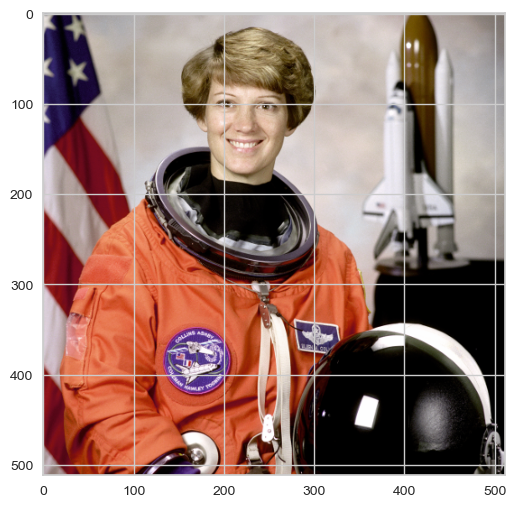

In [ ]:
# install skimage : pip install scikit-image

from skimage import data
original = data.astronaut()
plt.imshow(original)
plt.show()


In [84]:
pixels = original.reshape(original.shape[0] * original.shape[1],original.shape[2])
model_photo = KMeans(n_clusters =16)
model_photo.fit(pixels)

,n_clusters,16
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


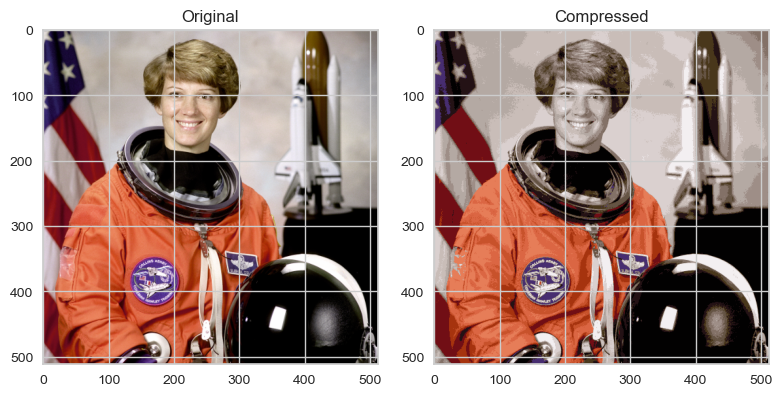

In [86]:
pixel_centroids = model_photo.labels_ 
cluster_centers = model_photo.cluster_centers_ 
compressed_pixels = np.zeros((pixel_centroids.shape[0],3),dtype="uint8") 
for cluster_no in range(16): 
    compressed_pixels[pixel_centroids==cluster_no] = cluster_centers[cluster_no] 

compressed_image = compressed_pixels.reshape(original.shape[0],original.shape[1],3)

# plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(compressed_image, cmap=plt.cm.gray)
ax[1].set_title("Compressed")

fig.tight_layout()
plt.show()

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

(1797, 64)


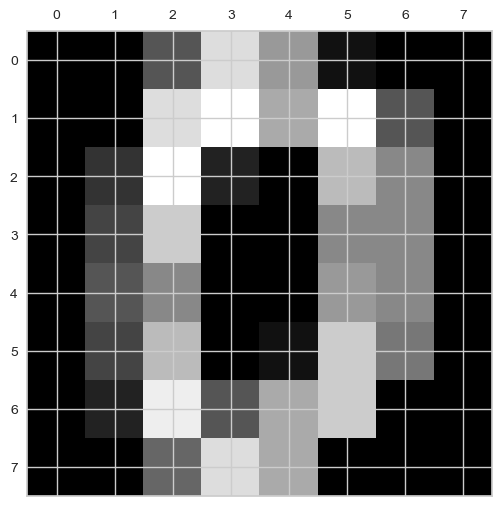

In [87]:
# code here
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)
import matplotlib.pyplot as plt
plt.matshow(digits.images[0], cmap="gray")

plt.show()

In [88]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(digits.data)
clusters = kmeans.predict(digits.data)
clusters

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


array([5, 7, 7, ..., 8, 9, 8])

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

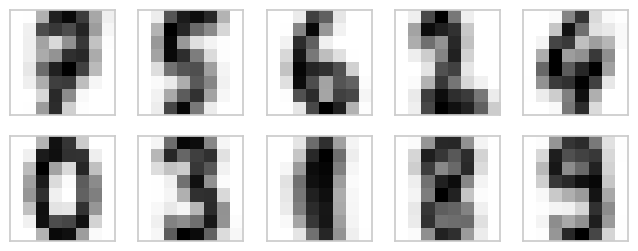

In [89]:
# code here
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [94]:
# code here
from scipy.stats import mode

labels = np.zeros_like(clusters)
print(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

[6 8 7 ... 7 9 7]


Now compute the accuracy score between the true labels from the data and the predicted ones.

In [95]:
# code here
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.9415692821368948

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

Text(202.97222222222226, 0.5, 'predicted label')

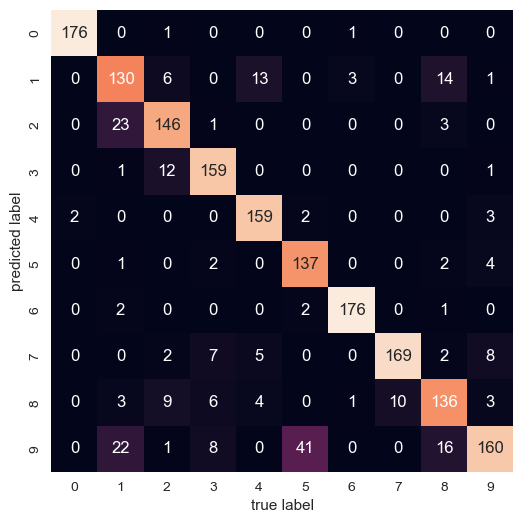

In [92]:
# code here
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [96]:
# code here
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


0.9415692821368948